# Sentiment Analysis for Government Departments

A simple Python worksheet for processing Twitter data to gague public sentiment and provide government departments with actionable information usefull for public relations and consultations.

### Prerequisites:
Data has been scaped using the #TAGS google spreadsheet tool

In [2]:
import pandas as pd
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1F15gF01liemxjR101uY9h52J1rUkwawwS70cmTMWYtU/pub?gid=400689247&single=true&output=csv')
tweet_data = data["text"]
tweet_text = " ".join([text for text in tweet_data])

### Processing:
The data is now cleaned and simplified prior to processing. Collections and counts are also prepared.

In [4]:
from nltk.tokenize.casual import (TweetTokenizer, casual_tokenize)
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter
from nltk import Text

text_tokens = casual_tokenize(tweet_text)
lower_tokens = [word.lower() for word in text_tokens if len(word) >1]
word_tokens = [word for word in lower_tokens if (word.isalpha() and not word.startswith("http")) and not word.startswith("@") and not word.startswith("#")]
stopps = stopwords.words("english") + ["rt", "via", "ping", "@:", "15", "10"]
unstop_tokens = [word for word in word_tokens if word not in stopps]
nltk_tokens = Text(unstop_tokens)

hashtags = [word for word in lower_tokens if word.startswith("#")]
ats = [word for word in lower_tokens if word.startswith("@")]

token_counts = Counter(unstop_tokens)
most_common_tokens = [token for token, count in token_counts.most_common(30)]
hashtag_counts = Counter(hashtags)
at_counts = Counter(ats)

freq_dist = FreqDist(unstop_tokens)

### Analysis
The data is now analysed to produce a variety of useful graphs and charts that can be assembled into a functional "Public Sentiment Dashboard" for a department or organization.

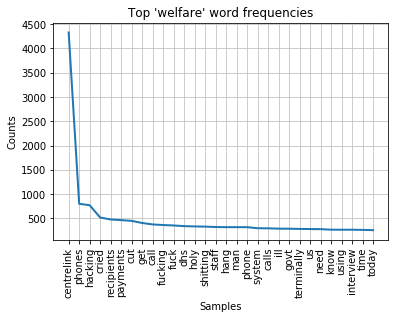

In [101]:
freq_dist.plot(30, cumulative=False, title="Top 'welfare' word frequencies")

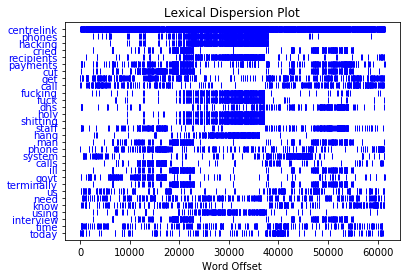

In [102]:
nltk_tokens.dispersion_plot(most_common_tokens)

In [103]:
for tag in hashtag_counts.most_common(10):
    print(tag[0][1:])

centrelink
notmydebt
auspol
robodebt
au
clddaily
aps
qanda
privacy
medicare


In [104]:
for user in at_counts.most_common(10):
    print(user[0][1:])

centrelink
asher_wolf
senatorludlam
virgotweet
smh
nadinefloodcpsu
dpn78
hughriminton
canberratimes
scientistmags


In [105]:
nltk_tokens.collocations(window_size=10, num=20)

hacking phones; cried terminally; cried ill; cried man; cried
interview; cried cut; cried payments; shitting holy; holy fuck;
fucking shitting; missed calls; shitting fuck; phones fucking; fucking
holy; terminally ill; fucking fuck; calls private; cried cried;
hacking recipients; ill man
